In [1]:
from train_unet import *

In [2]:
val(0)

Validation epoch 0: avg_dice_loss = 1.0169038146289426, avg_iou = 0.03378310671715594, avg_acc = 0.06487489240383035


(1.0169038146289426, 0.03378310671715594)

In [2]:
train_loss, val_loss = train()

starting training
epoch0, iter0, loss: 0.9991579055786133
epoch0, iter120, loss: 0.8260460495948792
epoch0, iter240, loss: 0.7960721850395203
epoch0, iter360, loss: 0.8074383735656738
epoch0, iter480, loss: 0.7772674560546875
epoch0, iter600, loss: 0.726813793182373
Finish epoch 0, time elapsed 57.0987503528595
Validation epoch 0: avg_dice_loss = 0.7817742561226461, avg_iou = 0.5007141128404816, avg_acc = 0.6542450671765342
best val loss achieved, saving model
--------------------
epoch1, iter0, loss: 0.7618391513824463
epoch1, iter120, loss: 0.747732400894165
epoch1, iter240, loss: 0.752458393573761
epoch1, iter360, loss: 0.7488264441490173
epoch1, iter480, loss: 0.7431207299232483
epoch1, iter600, loss: 0.7081319093704224
Finish epoch 1, time elapsed 58.09122347831726
Validation epoch 1: avg_dice_loss = 0.7726563441219615, avg_iou = 0.5285377142144673, avg_acc = 0.6744940693698712
best val loss achieved, saving model
--------------------
epoch2, iter0, loss: 0.7060097455978394
epoch2

epoch18, iter240, loss: 0.6210482120513916
epoch18, iter360, loss: 0.6047536134719849
epoch18, iter480, loss: 0.6077210903167725
epoch18, iter600, loss: 0.6119900941848755
Finish epoch 18, time elapsed 57.11716604232788
Validation epoch 18: avg_dice_loss = 0.7158817159595774, avg_iou = 0.6523060919633552, avg_acc = 0.7775564252440609
--------------------
epoch19, iter0, loss: 0.5792616605758667
epoch19, iter120, loss: 0.6449847221374512
epoch19, iter240, loss: 0.5673657655715942
epoch19, iter360, loss: 0.6179829835891724
epoch19, iter480, loss: 0.5917235612869263
epoch19, iter600, loss: 0.6455450654029846
Finish epoch 19, time elapsed 56.69755029678345
Validation epoch 19: avg_dice_loss = 0.7173806882616299, avg_iou = 0.6372658490245022, avg_acc = 0.7646646624180808
--------------------
epoch20, iter0, loss: 0.6037147045135498
epoch20, iter120, loss: 0.637507438659668
epoch20, iter240, loss: 0.5909754037857056
epoch20, iter360, loss: 0.6132136583328247
epoch20, iter480, loss: 0.6314520

epoch37, iter0, loss: 0.5821338295936584
epoch37, iter120, loss: 0.6300161480903625
epoch37, iter240, loss: 0.5197293162345886
epoch37, iter360, loss: 0.5577043294906616
epoch37, iter480, loss: 0.547492265701294
epoch37, iter600, loss: 0.6050808429718018
Finish epoch 37, time elapsed 59.978153228759766
Validation epoch 37: avg_dice_loss = 0.7218637103465066, avg_iou = 0.6617910902001964, avg_acc = 0.7856425116311259
--------------------
epoch38, iter0, loss: 0.5518050193786621
epoch38, iter120, loss: 0.5760669112205505
epoch38, iter240, loss: 0.5395147800445557
epoch38, iter360, loss: 0.5316412448883057
epoch38, iter480, loss: 0.5993603467941284
epoch38, iter600, loss: 0.6186981201171875
Finish epoch 38, time elapsed 59.32054018974304
Validation epoch 38: avg_dice_loss = 0.7242322402213937, avg_iou = 0.6599839615288066, avg_acc = 0.7838782415461184
--------------------
epoch39, iter0, loss: 0.5815361738204956
epoch39, iter120, loss: 0.5901280641555786
epoch39, iter240, loss: 0.60155868

In [3]:
def plot_loss_curves(train_loss,val_loss):
    title = "Loss 5c - Unet"
    fig_name = "Loss_unet_dice.jpg"
    x = [i for i in range(len(train_loss))]
    plt.plot(x, train_loss,label="Train Loss")
    plt.plot(x, val_loss,label="Validation Loss")
    plt.legend()
    plt.xlabel("# of epoch")
    plt.ylabel("Dice Loss")
    plt.grid(True)
    plt.title(title)
    plt.savefig(fig_name, dpi=300)
    plt.show()

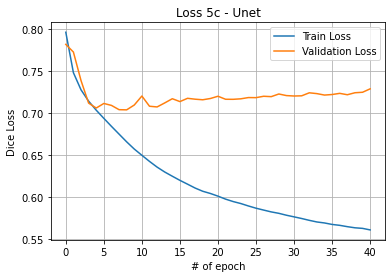

In [4]:
plot_loss_curves(train_loss,val_loss)

Final test from best model : avg_iou = 0.6707232784869066, avg_acc = 0.7938369638884245
 Class wise ious getting saved in unet_IOU_Classwise.csv file


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


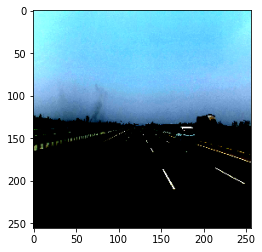

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


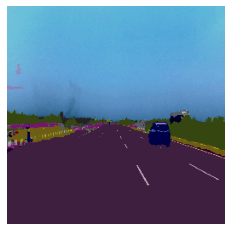

In [2]:
test()